# Anomaly Detection (Quality Control)

This is a project report for the final project for the ISEN 614 - Advanced Quality Control class taught in Fall 2016 at Texas A&M University by Dr. Yu Ding.

## Executive Summary

The  objective of this project was to identify the in-control and out-of-control samples. Due to high dimensionality, the noise components can add up to a great magnitude. As a result, the aggregated noise effect can overwhelm the signal effects thus making it harder to reject the null hypothesis. This phenomenon is known as curse of dimensionality. In this report since the number of dimensions are very high, we used principal component analysis (PCA) as the data reduction tool to reduce the data points and then used the Hotelling $T^2$ chart on the reduced data to isolate the in-control samples.

First, we calculated the mean vector and covariance matrix of the given data. Then, we calculated eigenvalues and eigenvectors of S to find the reduced dimension. These eigenvectors were used to form principal components from the original data. For the S matrix, we calculated the eigenvalues and arranged them in descending order. Thereafter, we plotted a graph and observed that the value of L for which MDL is minimum is 35. As 35 Principal Components (PC’s) are not nearly small enough we then used scree plot i.e. the plot of eigenvalues against the number of principal components to further compress data and reduce the Principal Components (PCs). From the scree plot, we observed that there is a bend where the x-axis value is 4. Therefore, we chose only the first 4 principal components for our analysis.

For Principal Component Analysis (PCA), we calculated the vector $y$ of principal components and then performed Phase I analysis on $y$. While performing the Phase I analysis of $y$, we approximated the upper control limit to 9.49 using a $\chi^2$ distribution. We then plotted the Hotelling $T^2$ statistic for each sample. To isolate in-control data, we removed out-of-control samples and recalculated the $T^2$ statistic till we were left with only the in-control samples. i.e there were 461 in-control samples. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2
from scipy.stats.mstats import gmean

In [2]:
#open excel file using pandas

book = pd.read_excel("project_dataset.xlsx", header =None)  

In [3]:
n, p = book.shape
print(f'n = {n}')
print(f'p = {p}')

n = 552
p = 209


## Understanding The Problem

The problem at hand has 552 samples, each with 209 data points.

This can be denoted with X as a matrix of shape 552x209

The $\mu_0$ and $\sum_0$ for this data are not known. Hence, this is a Phase I analysis with a sample size of 1. We will use the mean $\overline{X}$ and covariance matrix $S$ of the samples to estimate $\mu_0$ and $\sum_0$ for the data.

Since the number of dimensions is very high, we will first reduce data using principal component analysis and then use the Hotelling chart to isolate in-control data.


In [4]:
X = np.array(book)

## Data Reduction

For Principal Component Analysis (PCA), we need $\overline{X}$ and $S$ for the sample.

### Sample statistics:

$$ \overline{X} = \frac{1}{n} \sum_{i=1}^{n}X_i $$

where $X_i$ is one row of the matrix

$$ S = \frac{1}{n-1} (X - \overline{X})^T.(X - \overline{X}) $$

Since $S$ is the covariance matrix of variables, it is of shape 209x209.

Fortunately, numpy has functions available to calculate mean and covariance matrix.

In [5]:
Xbar = np.mean(X, axis = 0)

In [6]:
S = np.cov(X, rowvar=False)

### Eigen Values

We will calculate eigenvalues and eigenvectors of $S$ to find the reduced dimension. These eigenvectors will be used to form principal components from the original data

In [7]:
eigvals = np.linalg.eig(S)

### MDL Values

We plot a graph using the formula:

$$ MDL (l) = n(p-l)log(\frac{𝑎_𝑙}{𝑔_𝑙}) + \frac{l(2p – l)}{2}log(n) $$

Where $𝑎_𝑙 ,𝑔_𝑙$ are the arithmetic and geometric means respectively of the smallest (p – l) eigenvalues.


In [8]:
MDLmin = 100000000  #just some large number to start with
lmin = 0

MDL = []
for l in range(p):
    if l == 0:
        MDL.append(n*(p-l)*np.log(np.mean(eigvals[0][-1::-1])/gmean(eigvals[0][-1::-1])) + l*(2*p - l)*np.log(n)/2)
    else:
        MDL.append(n*(p-l)*np.log(np.mean(eigvals[0][-1:l-1:-1])/gmean(eigvals[0][-1:l-1:-1])) + l*(2*p - l)*np.log(n)/2)
    if MDL[l] < MDLmin:
        MDLmin = MDL[l]
        lmin = l

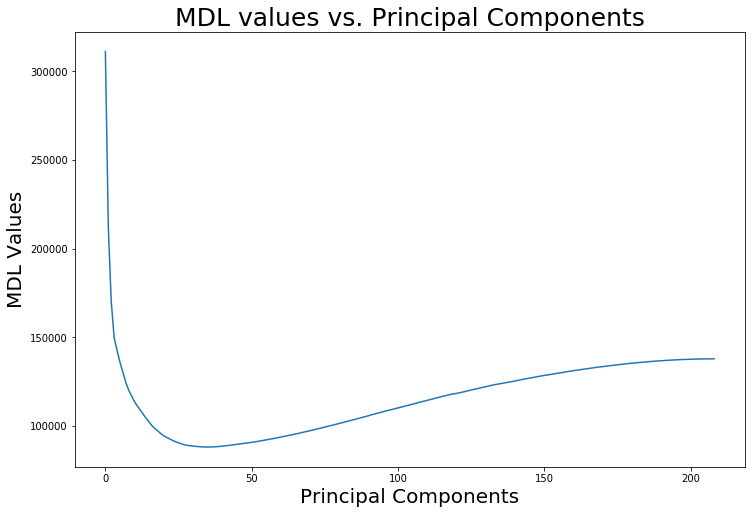

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(MDL)
ax.set_title('MDL values vs. Principal Components', fontsize = 25)
ax.set_xlabel('Principal Components', fontsize=20)
ax.set_ylabel('MDL Values', fontsize=20)
fig.savefig('images/MDL_Values.png')
plt.show()

![](images/MDL_Values.png)

### Scree Plot

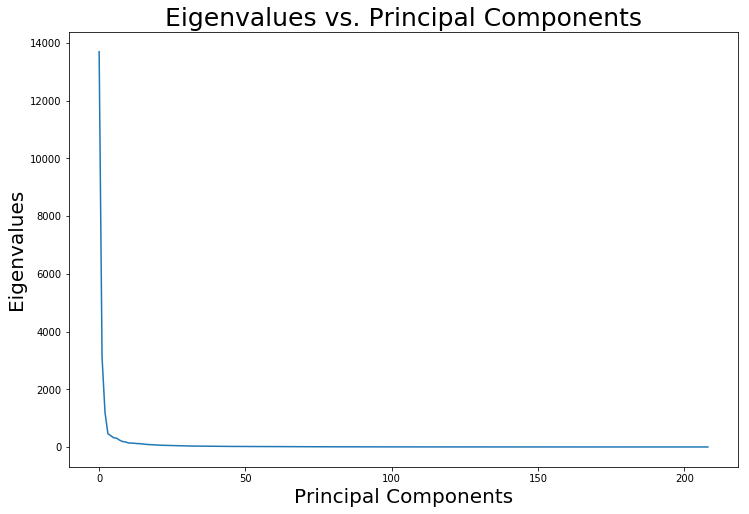

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(eigvals[0])
ax.set_title('Eigenvalues vs. Principal Components', fontsize = 25)
ax.set_xlabel('Principal Components', fontsize=20)
ax.set_ylabel('Eigenvalues', fontsize=20)
fig.savefig('images/Scree_plot.png')
plt.show()

![](images/Scree_plot.png)

### Prinicipal Component Analysis

For Principal Component Analysis (PCA), we calculate the vector y, such that

$$ 𝑦= X.𝑒$$ 

Where $𝑒_j$ is the $j^{𝑡ℎ}$ eigenvector of $S$ and $j \in \{1,..,4\}$.

In [11]:
e = eigvals[1][:,:4]
y = np.dot(X,e)

As there are n (= 552) samples, $y$ is of shape 552x4

We will now perform Phase I analysis on $y$. 

## Phase I Analysis



### Upper Control Limit

For Phase I analysis of $y$, we approximate the upper control limit using

$$ 𝑈𝐶𝐿 = \chi^2_{1 −\alpha}  (p) $$

In [12]:
alpha = 0.05
p = 4
UCL = chi2.ppf(1 - alpha, p)
print(f'UCL = {UCL}')

UCL = 9.487729036781154


Here, we have chosen $\alpha = 0.05$. $p$ is the reduced dimension, hence $p = 4$. looking up the chi-square distribution table

$$ UCL = 9.49 $$

### Hotelling Statistic First Iteration

We will now plot the Hotelling $T^2$ statistic for each sample. To isolate in-control data, we will remove out-of-control samples and recalculate the $T^2$ statistic till we are left with only in-control samples.


To calculate $T^2$ statistic, we use:

$$ T^2 = (y_i - \overline{y})^T S_y^{-1} (y_i - \overline{y}) $$

Where $\overline{y}$ is the mean of $y$, $S$ is the covariance matrix of $y$ and $i \in \{1,2, ..., n\}$ is the sample number

These can be calculated the same way as we did for X

$$ \overline{y} = \frac{1}{n} \sum_{i=1}^{n}y_i $$

where $y_i$ is one row of the $y$ matrix

$$ S_y = \frac{1}{n-1} (y - \overline{y})^T.(y - \overline{y}) $$

In [13]:
def get_Tsquare(y):
    ybar = np.mean(y,axis = 0)
    S_y = np.cov(y, rowvar=False)
    Tsquare = []
    n = y.shape[0]
    for i in range(n):
        Tsquare.append(np.dot(np.dot((y[i]-ybar).T,np.linalg.inv(S_y)),y[i]-ybar))
    return np.array(Tsquare)

In [14]:
Tsquare = get_Tsquare(y)

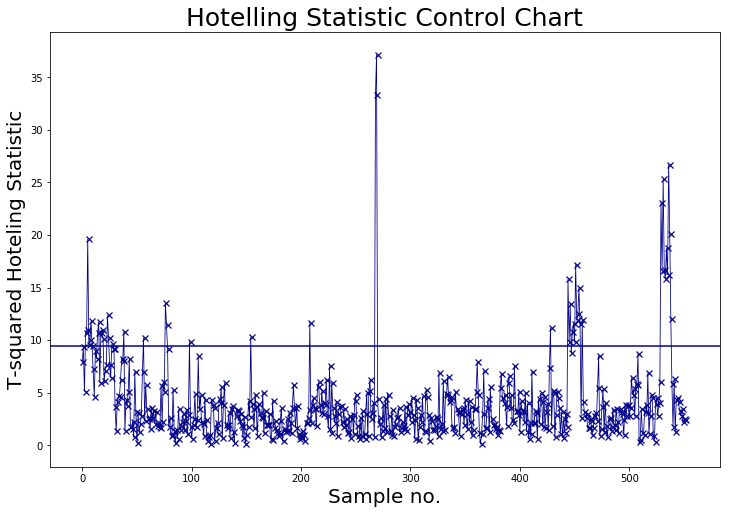

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(Tsquare, c = 'darkblue', linewidth = 0.8)
ax.scatter(range(1,n+1),Tsquare, c = 'darkblue', marker = 'x', linewidth = 1.2)
ax.axhline(y = UCL, color = 'darkblue')
ax.set_title('Hotelling Statistic Control Chart', fontsize = 25)
ax.set_xlabel('Sample no.', fontsize=20)
ax.set_ylabel('T-squared Hoteling Statistic', fontsize=20)
fig.savefig('images/Tsquared_First_Iteration.png')
plt.show()

![](images/Tsquared_First_Iteration.png)
In this plot, it can be seen that there are several samples that are out of control

### Hotelling Statistic In-Control Samples

In [16]:
def PhaseIAnalysis(y):
    n = y.shape[0]
    p = y.shape[1]
    alpha = 0.05
    UCL = chi2.ppf(1 - alpha,p)
    Tsquare = get_Tsquare(y)
    if all(Tsquare < UCL):
        return Tsquare
    else:
        return PhaseIAnalysis(y[Tsquare < UCL])

In [17]:
Tsquare = PhaseIAnalysis(y)

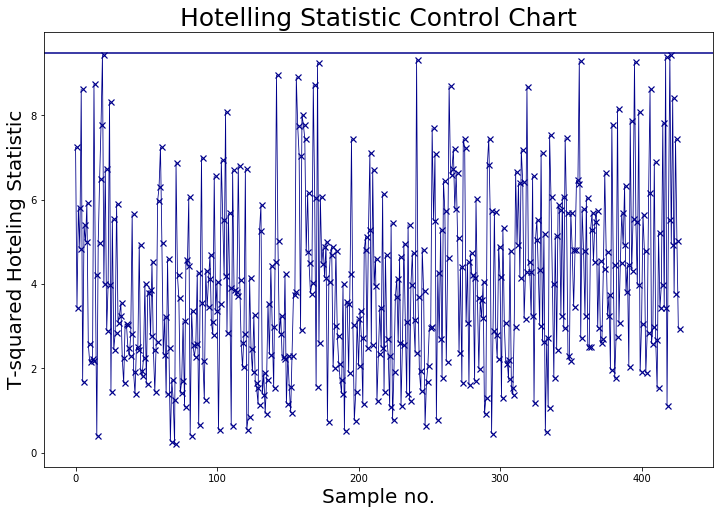

In [18]:
n = len(Tsquare)
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(Tsquare, c = 'darkblue', linewidth = 0.8)
ax.scatter(range(1,n+1),Tsquare, c = 'darkblue', marker = 'x', linewidth = 1.2)
ax.axhline(y = UCL, color = 'darkblue')
ax.set_title('Hotelling Statistic Control Chart', fontsize = 25)
ax.set_xlabel('Sample no.', fontsize=20)
ax.set_ylabel('T-squared Hoteling Statistic', fontsize=20)
fig.savefig('images/Tsquared_In-control.png')
plt.show()

In [19]:
len(Tsquare)

427

![](images/Tsquared_In-control.png)
In this plot, all samples are in control. In total there are 427 in-control samples.